<a href="https://colab.research.google.com/github/datascience-uniandes/classification_tutorial/blob/master/cancer/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: Estimate if a brain tumor is malignant or benign

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
Last update: October, 2023

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

### Reading the dataset

In [2]:
# Reading CSV
cancer_df = pd.read_csv("./data/cancer.csv", sep=",")

In [3]:
# Deleting unused column
del cancer_df["Unnamed: 32"]

In [4]:
cancer_df.shape

(569, 32)

In [5]:
cancer_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Splitting train and test datasets

In [9]:
# Selecting features to train the model
features = cancer_df.columns.tolist()[2:]

In [10]:
# Creating feature matrix
X = cancer_df[features]

In [11]:
# Creating target
Y = cancer_df["diagnosis"].replace({"B": 0, "M": 1})

/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_26813/3485837342.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = cancer_df["diagnosis"].replace({"B": 0, "M": 1})


In [12]:
Y.value_counts(normalize = True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [13]:
# Splitting feature matrix for training (70%) and test (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=500)

In [14]:
Y_train.value_counts(normalize = True)

diagnosis
0    0.628141
1    0.371859
Name: proportion, dtype: float64

In [15]:
Y_test.value_counts(normalize = True)

diagnosis
0    0.625731
1    0.374269
Name: proportion, dtype: float64

### Training the model

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
# Initializing the model
model = LogisticRegression(penalty="l2", C=0.1, solver="liblinear", class_weight="balanced", random_state=80)

In [19]:
# Training the model using training dataset
model.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')

In [20]:
pd.DataFrame(np.append(np.array(features).reshape(-1, 1), model.coef_.reshape(-1, 1), axis=1), columns=["feature", "coefficient"])

,feature,coefficient
0,radius_mean,0.3751297373792716
1,texture_mean,0.37745142966076883
2,perimeter_mean,0.3592446711379221
3,area_mean,0.366740403227548
4,smoothness_mean,0.1668909968010896
5,compactness_mean,-0.05210889971223941
6,concavity_mean,0.2872299319113864
7,concave points_mean,0.37434280496829353
8,symmetry_mean,-0.013680520912574112
9,fractal_dimension_mean,-0.2285847281576669


<span style="color: red;">Q: How to interpret coefficients in Logistic Regression?</span>

### Evaluating the model

In [21]:
# Predicting for test dataset
predictions = model.predict(scaler.transform(X_test))

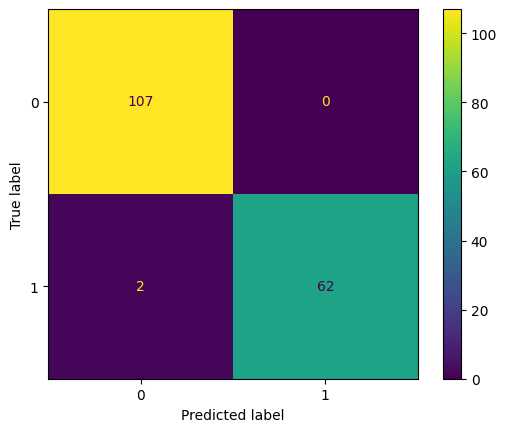

In [22]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

In [23]:
# Calculating confusion matrix derived metrics
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1", f1_score(Y_test, predictions))

Precision: 1.0
Recall: 0.96875
F1 0.9841269841269841


### Analyzing probabilities

In [24]:
probabilities = model.predict_proba(scaler.transform(X_test))[:,1]

In [25]:
probs_true_df = pd.DataFrame(np.append(probabilities.reshape(-1, 1), Y_test.values.reshape(-1, 1), axis=1), columns=["probs", "true"])

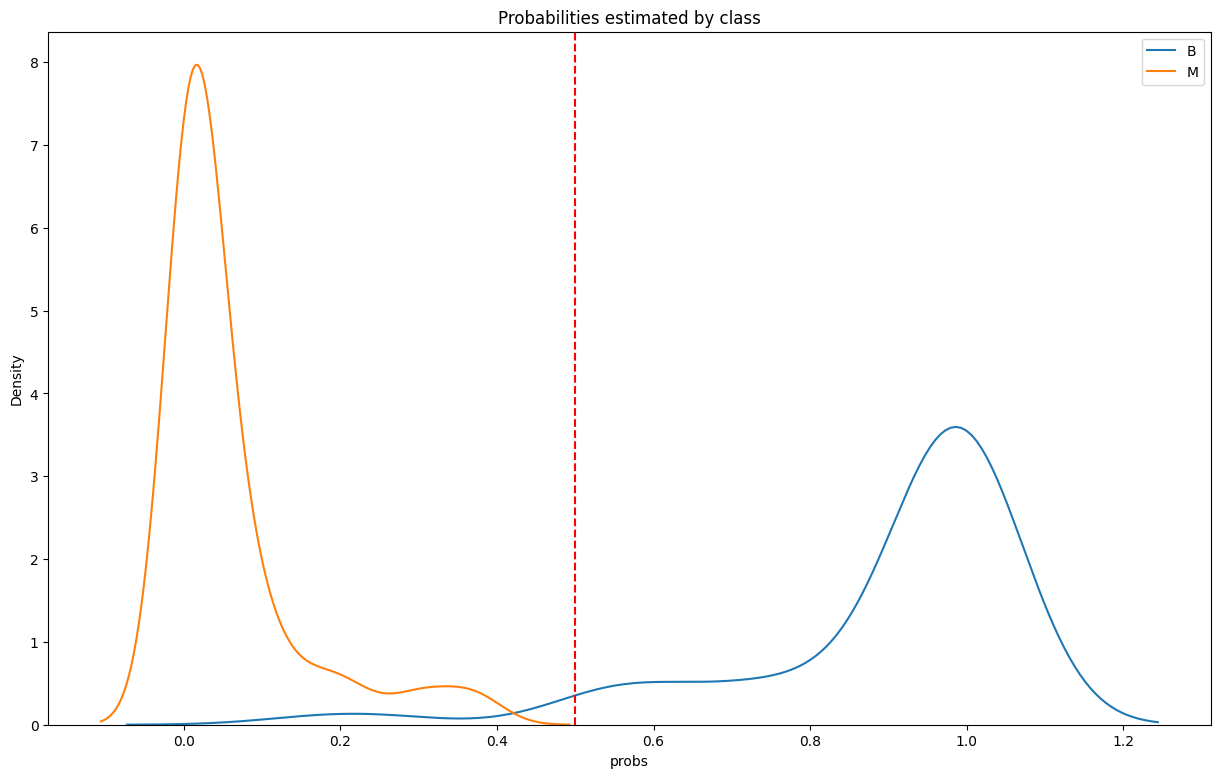

In [26]:
plt.figure(figsize=(15, 9))
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 1], x="probs", label="B")
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 0], x="probs", label="M")
plt.axvline(x=.5, color="r", linestyle="--")
plt.title('Probabilities estimated by class')
plt.legend()
plt.show()